In [433]:
## Importing Libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
from sklearn import svm
import openpyxl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from timeit import default_timer as timer
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime
from sklearn import *
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVR
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [392]:
## Declaring variables ##
df = pd.read_csv('cleaned_heightdata.csv')
df_concat = pd.DataFrame()

array(['The Pocket (Marshalls Creek)', nan, 'Durrumbul (Brunswick River)',
       'Mullumbimby Creek (Mullumbimby Ck)',
       'Billinudgel (Marshalls Creek)', 'Brunswick Heads (Tidal)',
       'Yelgun (Yelgun Creek)', 'Orana Bridge (Marshalls Creek)',
       'Yelgun Creek (Helen St Bridge)'], dtype=object)

In [393]:
## Melting the data ##

for i in df.LOC_NAME.unique():
    cf = df[df.LOC_NAME == str(i)]
    cf.OBS_TIME_LOC = pd.to_datetime(cf['OBS_TIME_LOC'])
    cf = cf.set_index('OBS_TIME_LOC')
    resampled = cf.resample('D').mean()
    df_concat = pd.concat([df_concat, resampled.HT.rename(str(i))], axis=1)      

C:\Users\matty enright\anaconda3\envs\NewEnvironment\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [394]:
## Feature extraction and processing ##
df_concat = df_concat.drop('nan',axis=1)
df_concat = df_concat.drop(['Yelgun (Yelgun Creek)','Orana Bridge (Marshalls Creek)','Yelgun Creek (Helen St Bridge)'], axis=1)
df = df_concat.dropna()

In [398]:
## Feature manipulation ## 
df['three'] = df['The Pocket (Marshalls Creek)'].shift(-3)
df['seven']= df['The Pocket (Marshalls Creek)'].shift(7)
df['four'] = df['The Pocket (Marshalls Creek)'].shift(14) 
df = df.dropna()

C:\Users\matty enright\anaconda3\envs\NewEnvironment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\matty enright\anaconda3\envs\NewEnvironment\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\matty enright\anaconda3\envs\NewEnvironment\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [399]:
## Setting training and testing data ## 
training_data  = df[df.index<datetime(2017, 3, 1)]
testing_data   = df[df.index>datetime(2017, 3, 1)]

In [400]:


## Defining Y and X values ## 
X_train = training_data.drop(["three"], axis=1) 
y_train = training_data["three"]

## Defining Y and X values ## 
X_test = testing_data.drop(["three"], axis=1) 
y_test = testing_data["three"]

In [418]:
## Building and fittinh the model ##

LR = svm.LinearSVR(loss = 'epsilon_insensitive')

## Fitting the training data ##
LR.fit(X_train,y_train) 

## Creating prediction ##
y_prediction = LR.predict(X_test) 
#y_prediction[y_prediction < 0.0] = 0.0

## Calculating prediction and actual valus ##
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})

C:\Users\matty enright\anaconda3\envs\NewEnvironment\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [435]:
## Retrieving R2 Score, MSE, MAPE score ##
print("R2 Score is "  + str(r2_score(y_test, y_prediction)) +
      " ::: MSE Score is " + str(mean_absolute_error(y_test, y_prediction)) +
      " ::: MAPE Score is " + str(mean_absolute_percentage_error(y_test, y_prediction))
     )

R2 Score is 0.3945643145765456 ::: MSE Score is 0.05789930348220456 ::: MAE Score is 0.05806221767010433


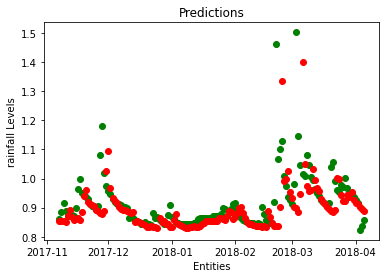

In [422]:
## Visualisation of predictions - Setting specifics for graph ##
fig = plt.figure()
ax1 = fig.add_subplot(111)

## Visualisation of predictions - Creating graph ##
plt.title("Predictions")
plt.ylabel("rainfall Levels")
plt.xlabel("Entities")
ax1.scatter(df1.index[250:400],df1.Actual[250:400].values,color='g')
ax1.scatter(df1.index[250:400],df1.Predicted[250:400].values, color='r')

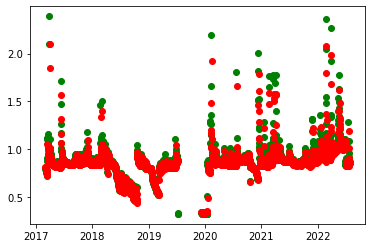

In [421]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df1.index,df1.Actual.values,color='g')
ax1.scatter(df1.index,df1.Predicted.values, color='r')

In [ ]:
df_concat = pd.DataFrame()

for i in df.LOC_NAME.unique():
    cf = df[df.LOC_NAME == str(i)]
    cf.OBS_TIME_LOC = pd.to_datetime(cf['OBS_TIME_LOC'])
    cf = cf.set_index('OBS_TIME_LOC')
    resampled = cf.resample('D').mean()
    df_concat = pd.concat([df_concat, resampled.change.rename(str(i))], axis=1)












#for j in range(0,len(GEO)):
   #     dst = 9999
    #    smallDist = 99999
    #    values = []
        
       # for i in range(0,len(CGEO)):
         #   dst = distance.euclidean(GEO[j],CGEO[i]) 
            
          #  if dst < smallDist: 
          #      smallDist = dst
           #     values=CGEO[i]
                
           # newList['LAT'] = newList['LAT'].replace({values[0]:GEO[j][0]})
            
           # newList['LONG'] = newList['LONG'].replace({values[1]:GEO[j][1]})
            
            
            
#newList['LAT']            
            df_concat = df_concat.drop('nan',axis=1)

df_concat = df_concat.drop(['Yelgun (Yelgun Creek)','Orana Bridge (Marshalls Creek)','Yelgun Creek (Helen St Bridge)'], axis=1)

df_concat['The Pocket (Marshalls Creek)']